<a href="https://colab.research.google.com/github/neerja198/Data-Science-Portfolio-in-Python/blob/master/Statistical_Learning_Tutorial_for_Beginners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Statistical Learning Tutorial for Beginners**

**Histogram**

**Outliers**

**Box Plot**

**Summary Statistics**

**Cumulative distribution function or CDF**

**Effect size**

**Relationship Between Variables**

**Correlation**

**Covariance**

**Pearson Correlation**

**Mean VS Median**

**Hypothesis Testing**

**Normal(Gaussian) Distribution and z-score**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [0]:
#Read the File using Pandas
df = pd.read_csv('/content/data.csv')

FileNotFoundError: ignored

In [0]:
# quick look to data
df.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.049040,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.013080,0.01860,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.040060,0.03832,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.03672,0.011370,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.02254,0.010390,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.035020,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.07743,0.014320,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [0]:
df = df.drop(['Unnamed: 32','id'],axis = 1)
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [0]:
#Tell you about the total numbers of rows and columns or dimension of matrix.
df.shape

(569, 33)

# **Histogram**
A histogram is a bar graph of raw data that creates a picture of the data distribution. The bars represent the frequency of occurrence by classes of data. A histogram shows basic information about the data set, such as central location , width of spread , and shape.

or
1. How many times each value appears in dataset. This description is called the distribution of variable.

2. Most common way to represent distribution of varible is histogram that is graph which shows frequency of each value.

3. Frequency = number of times each value appears.

4. Example: [1,1,1,1,2,2,2]. Frequency of 1 is four and frequency of 2 is three.


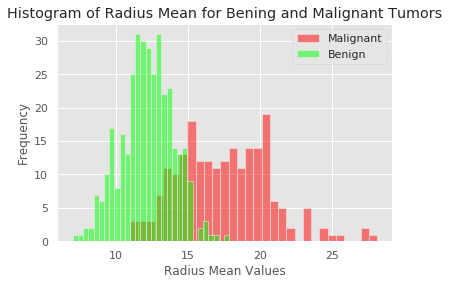

In [0]:
#Let's plot the histogram by finding mean 
m = plt.hist(data[data["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(data[data["diagnosis"] == "B"].radius_mean,bins=30,fc = (0,1,0,0.5),label = "Benign")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()


In [0]:
#Most frequent malignant radius mean is:
frequent_malignant_radius_mean = m[0].max()
index_frequent_malignant_radius_mean = list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m[1][index_frequent_malignant_radius_mean]
print("Most frequent malignant radius mean is: ",most_frequent_malignant_radius_mean)

Most frequent malignant radius mean is:  20.101999999999997


Lets look at the conclusions:
From this graph you can see that radius mean of malignant tumors are bigger than radius mean of bening tumors mostly.

The bening distribution (green in graph) is approcimately bell-shaped that is shape of normal distribution (gaussian distribution)

Also you can find result like that most frequent malignant radius mean.

# **Outlier**
In statistics, an outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses.

**Example: 5,7,4,4,6,2,8**

put them in order : 2,4,4,5,6,7,8

Cut the list into quarters:

Quartile 1(Q1) = 4

Quartile 2((Q2) = 5 - This is also median.

Quartile 3 (Q3) = 7


**Interquartile Range**
Q3 - Q1 
7-4 = 3


While looking histogram as ok can see there are rare values in bening distribution (green in graph)

There values can be errors or rare events.

These errors and rare events can be called outliers.

Calculating outliers:
first we need to calculate first quartile (Q1)(25%)

then find IQR(inter quartile range) = Q3-Q1

finally compute Q1 - 1.5IQR and Q3 + 1.5IQR

Anything outside this range is an outlier

lets write the code for bening tumor distribution for feature radius mean

For more detail follow the below link:
https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

In [0]:
data_benign = data[data["diagnosis"] == "B"]
data_malignant = data[data["diagnosis"] == "M"]
desc = data_benign.radius_mean.describe()
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")
data_benign[data_benign.radius_mean < lower_bound].radius_mean
print("Outliers: ",data_benign[(data_benign.radius_mean < lower_bound) | (data_benign.radius_mean > upper_bound)].radius_mean.values)

Anything outside this range is an outlier: ( 7.645000000000001 , 16.805 )
Outliers:  [ 6.981 16.84  17.85 ]


# **Box Plot**

You can see outliers also from box plots

We found 3 outlier in bening radius mean and in box plot there are 3 outlier.

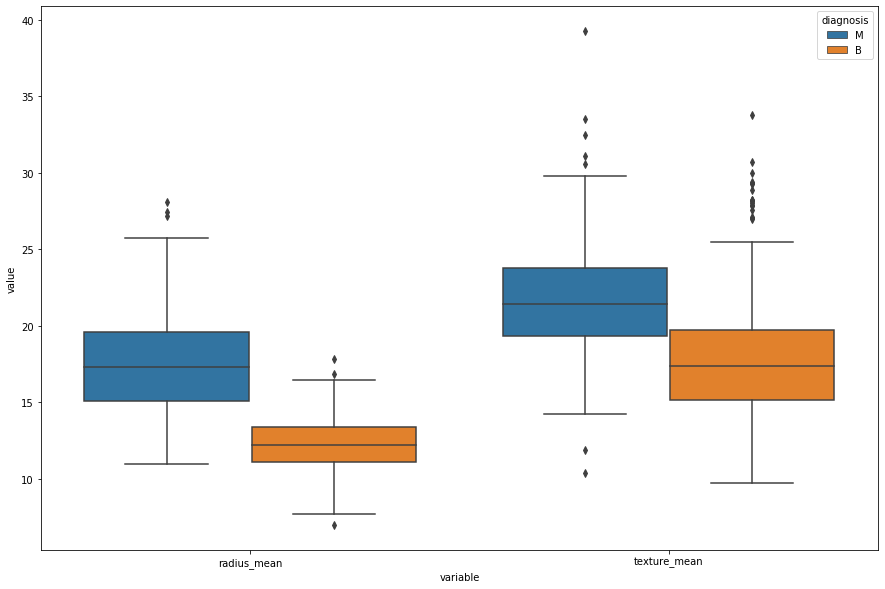

In [0]:
melted_data = pd.melt(data,id_vars = "diagnosis",value_vars = ['radius_mean', 'texture_mean'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
plt.show()

**Summary Statistics**

**Mean** 

**Variance:** spread of distribution 

**Standard deviation** square root of variance

Lets look at summary statistics of bening tumor radiance mean

In [0]:
print("mean: ",data_benign.radius_mean.mean())
print("variance: ",data_benign.radius_mean.var())
print("standart deviation (std): ",data_benign.radius_mean.std())
print("describe method: ",data_benign.radius_mean.describe())

mean:  12.14652380952381
variance:  3.170221722043872
standart deviation (std):  1.7805116461410389
describe method:  count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64


# **CDF**
The cumulative distribution function (CDF) calculates the cumulative probability for a given x-value. Use the CDF to determine the probability that a random observation that is taken from the population will be less than or equal to a certain value.

Cumulative distribution function is the probability that the variable takes a value less than or equal to x. P(X <= x)

Lets explain in cdf graph of benign radius mean
in graph, what is P(12 < X)? The answer is 0.5. 

The probability that the variable takes a values less than or equal to 12(radius mean) is 0.5.

You can plot cdf with two different method

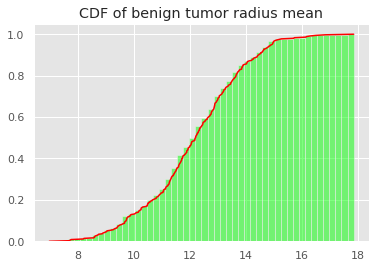

In [0]:
plt.hist(data_benign.radius_mean,bins=50,fc=(0,1,0,0.5),label='Benign',normed = True,cumulative = True)
sorted_data = np.sort(data_benign.radius_mean)

y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,y,color='red')
plt.title('CDF of benign tumor radius mean')
plt.show()

# **Effect size**
Effect size is a simple way of quantifying the difference between two groups that has many advantages over the use of tests of statistical significance alone. 

Cohen suggested that d=0.2 be considered a 'small' effect size, 0.5 represents a 'medium' effect size and 0.8 a 'large' effect size. This means that if two groups' means don't differ by 0.2 standard deviations or more, the difference is trivial, even if it is statistically significant.

lets compare size of the effect between bening radius mean and malignant radius mean.

Effect size is 2.2 that is too big and says that two groups are different from each other as we expect. Because our groups are bening radius mean and malignant radius mean that are different from each other.

In [0]:
#Code to find the Effect Size
mean_diff = data_malignant.radius_mean.mean() - data_benign.radius_mean.mean()
var_benign = data_benign.radius_mean.var()
var_malignant = data_malignant.radius_mean.var()
var_pooled = (len(data_benign)*var_benign +len(data_malignant)*var_malignant ) / float(len(data_benign)+ len(data_malignant))
effect_size = mean_diff/np.sqrt(var_pooled)
print("Effect size: ",effect_size)

Effect size:  2.2048585165041428


# **Relationship Between Variables**
We can say that two variables are related with each other, if one of them gives information about others.For example, price and distance. If you go long distance with taxi you will pay more. Therefore we can say that price and distance are positively related with each other.

Scatter Plot

Simplest way to check relationship between two variables
Lets look at relationship between radius mean and area mean.

In scatter plot you can see that when radius mean increases, area mean also increases. Therefore, they are positively correlated with each other.



<Figure size 1080x720 with 0 Axes>

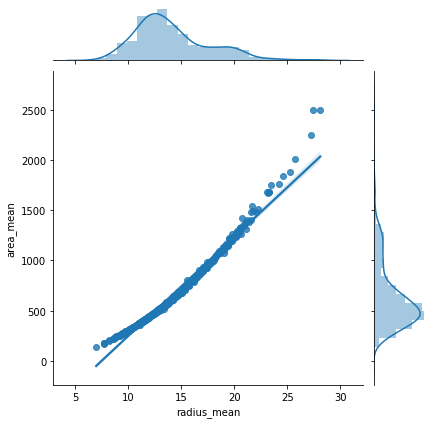

In [0]:
plt.figure(figsize = (15,10))
sns.jointplot(data.radius_mean,data.area_mean,kind="regg")
plt.show()

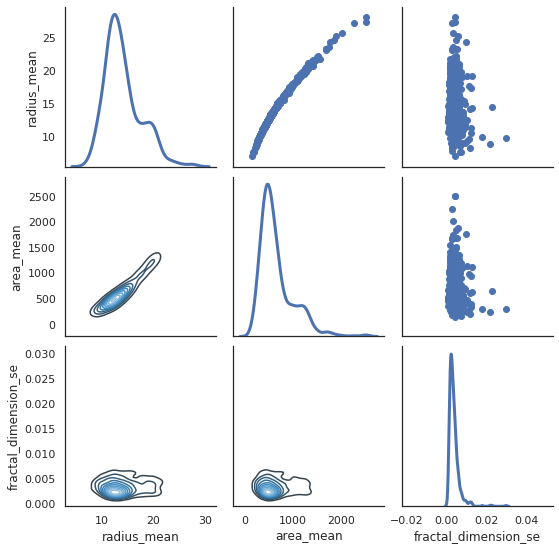

In [0]:
# We can look relationship between more than 2 distribution
sns.set(style = "white")
df = data.loc[:,["radius_mean","area_mean","fractal_dimension_se"]]
g = sns.PairGrid(df,diag_sharey = False,)
g.map_lower(sns.kdeplot,cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,lw =3)
plt.show()

There is no correlation between area mean and fractal dimension se. Because when area mean changes, fractal dimension se is not affected by chance of area mean.

# **Correlation**

Strength of the relationship between two variables.

Lets look at correlation between all features.

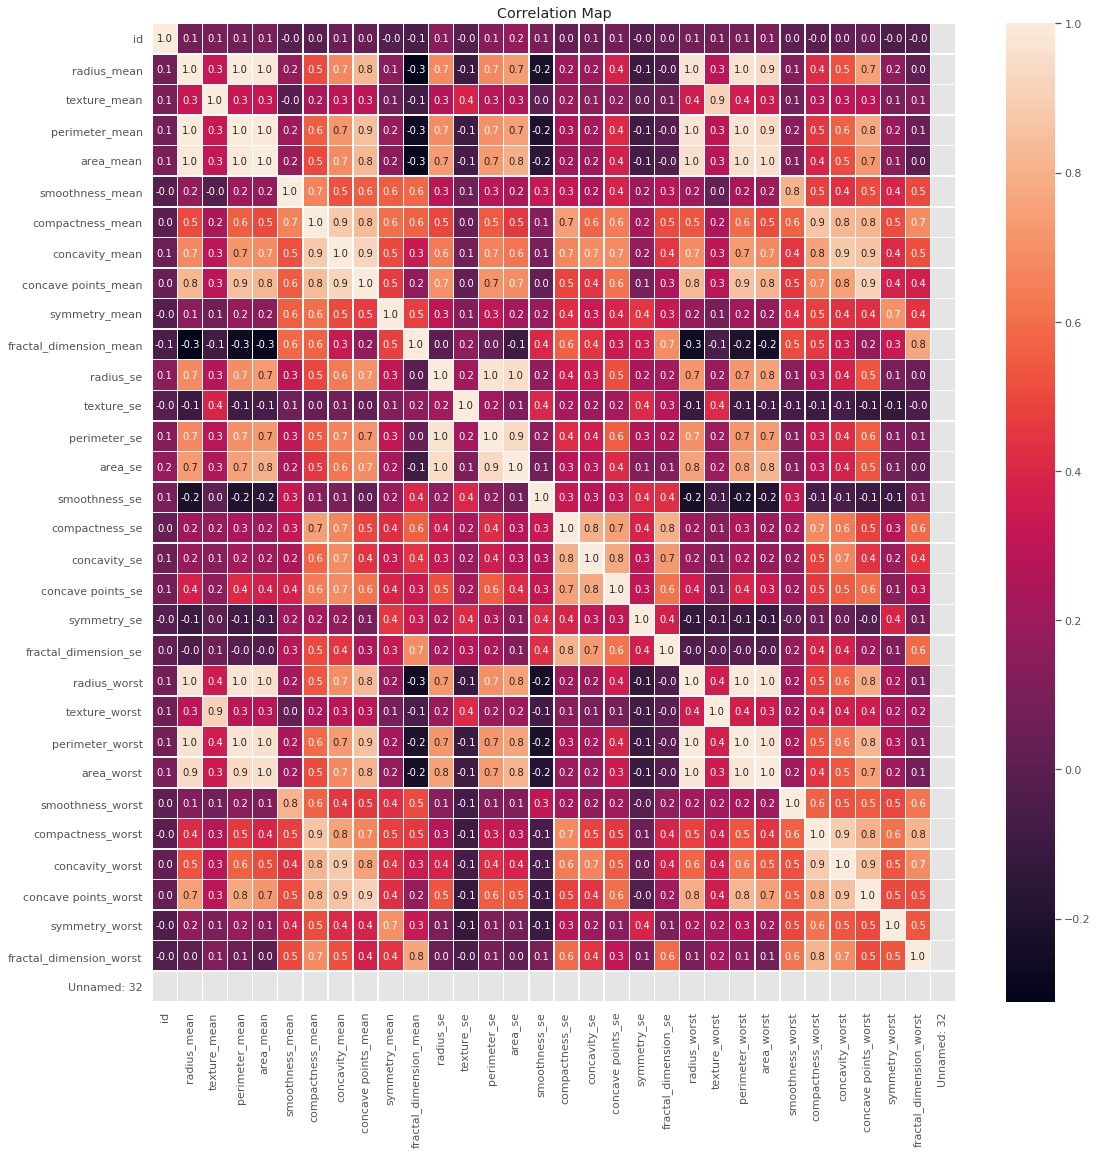

In [0]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

Huge matrix that includes a lot of numbers
The range of this numbers are -1 to 1.

Meaning of 1 is two variable are positively correlated with each other like radius mean and area mean.

Meaning of zero is there is no correlation between variables like radius mean and fractal dimension se.

Meaning of -1 is two variables are negatively correlated with each other like radius mean and fractal dimension mean.

Actually correlation between of them is not -1, it is -0.3 but the idea is that if sign of correlation is negative that means that there is negative correlation.

# **Covariance**
Covariance is a measure of how much two random variables vary together. It's similar to variance, but where variance tells you how a single variable varies, co variance tells you how two variables vary together.

So covariance is maximized if two vectors are identical
Covariance is zero if they are orthogonal.

Covariance is negative if they point in opposite direction.

Lets look at covariance between radius mean and area mean.

Then look at radius mean and fractal dimension se.

In [0]:
np.cov(data.radius_mean,data.area_mean)
print("Covariance between radius mean and area mean: ",data.radius_mean.cov(data.area_mean))
print("Covariance between radius mean and fractal dimension se: ",data.radius_mean.cov(data.fractal_dimension_se))

Covariance between radius mean and area mean:  1224.4834093464567
Covariance between radius mean and fractal dimension se:  -0.00039762485764406277


# **Pearson Correlation**
A Pearson's correlation is used when the two statistics we want to analyze are both quantitative. This means we will be comparing quantitative variables to find a linear relationship (if the variables represent a nonlinear relationship, a correlation is not appropriate).

Division of covariance by standard deviation of variables
Lets look at pearson correlation between radius mean and area mean.

First lets use .corr() method that we used actually at correlation part. In correlation part we actually used pearson correlation :)

p1 and p2 is the same. In p1 we use corr() method, in p2 we apply definition of pearson correlation (cov(A,B)/(std(A)*std(B)))

As we expect pearson correlation between area_mean and area_mean is 1 that means that they are same distribution.

Also pearson correlation between area_mean and radius_mean is 0.98 that means that they are positively correlated with each other and relationship between of the is very high.

To be more clear what we did at correlation part and pearson correlation part is same.

In [0]:
p1 = data.loc[:,["area_mean","radius_mean"]].corr(method= "pearson")
p2 = data.radius_mean.cov(data.area_mean)/(data.radius_mean.std()*data.area_mean.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)

Pearson correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.987357
radius_mean   0.987357     1.000000
Pearson correlation:  0.987357170056613


# **Mean VS Median**
Sometimes instead of mean we need to use median. I am going to explain why we need to use median with an example
Lets think that there are 10 people who work in a company. Boss of the company will make raise in their salary if their mean of salary is smaller than 5

In [0]:
salary = [1,4,3,2,5,4,2,3,1,500]
print("Mean of salary: ",np.mean(salary))

Mean of salary:  52.5


Mean of salary is 52.5 so the boss thinks that oooo I gave a lot of salary to my employees. And do not makes raise in their salaries. 

However as you know this is not fair and 500(salary) is outlier for this salary list.

Median avoids outliers.

In [0]:
print("Median of salary: ",np.median(salary))

Median of salary:  3.0


Now median of the salary is 3 and it is less than 5 and employees will take raise in their sallaries and they are happy and this situation is fair :)

# **Hypothesis Testing**

Statisticians use hypothesis testing to formally check whether the hypothesis is accepted or rejected. 

**Purpose :** Hypothesis testing is an Inferential Statistical technique used to determine whether there is enough evidence in a data sample to infer that a certain condition holds true for an entire population.

**There are basically two types**, namely, null hypothesis and alternative hypothesis. A research generally starts with a problem. Next, these hypotheses provide the researcher with some specific restatements and clarifications of the research problem

**A p value is used in hypothesis testing** to help you support or reject the null hypothesis. The p value is the evidence against a null hypothesis. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis.

**Example :** If I give a plant an unlimited amount of sunlight, then the plant will grow to its largest possible size." Hypothesis cannot be proven correct from the data obtained in the experiment, instead hypothesis are either supported by the data collected or refuted by the data collected.


Now lets make our example:
I want to learn that are radius mean and area mean related with each other? My null hypothesis is that "relationship between radius mean and area mean is zero in tumor population'.
Now we need to refuse this null hypothesis in order to demonstrate that radius mean and area mean are related. (actually we know it from our previous experiences)
lets find p-value (probability value)


In [0]:
statistic, p_value = stats.ttest_rel(data.radius_mean,data.area_mean)
print('p-value: ',p_value)

p-value:  1.5253492492559045e-184


P values is almost zero so we can reject null hypothesis.

https://www.datacamp.com/community/tutorials/hypothesis-testing-machine-learning

# **Normal(Gaussian) Distribution and z-score**
Z-scores range from -3 standard deviations (which would fall to the far left of the normal distribution curve) up to +3 standard deviations (which would fall to the far right of the normal distribution curve). ... A z-score can tell you where that person's weight is compared to the average population's mean weight.

Let's explain it with example
The classic example is gaussian is IQ score.

In the world lets say average IQ is 110.

There are few people that are super intelligent and their IQs are higher than 110. It can be 140 or 150 but it is rare.

Also there are few people that have low intelligent and their IQ is lower than 110. It can be 40 or 50 but it is rare.

From these information we can say that mean of IQ is 110. And lets say standard deviation is 20.

Mean and standard deviation is parameters of normal distribution.

Lets create 100000 sample and visualize it with histogram.

mean:  109.97291909771785
standart deviation:  19.92828161714182


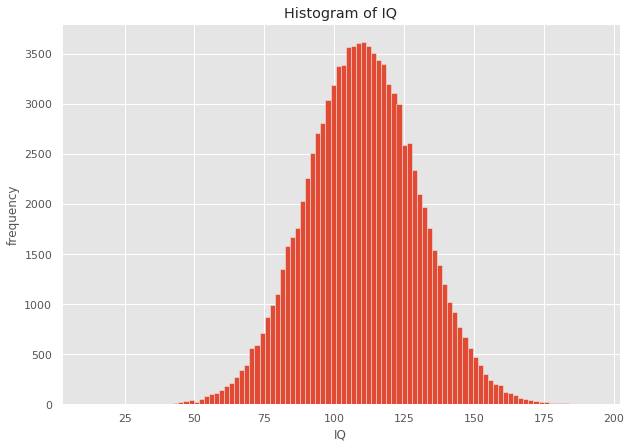

In [0]:
# parameters of normal distribution
mu, sigma = 110, 20  # mean and standard deviation
s = np.random.normal(mu, sigma, 100000)
print("mean: ", np.mean(s))
print("standart deviation: ", np.std(s))
# visualize with histogram
plt.figure(figsize = (10,7))
plt.hist(s, 100, normed=False)
plt.ylabel("frequency")
plt.xlabel("IQ")
plt.title("Histogram of IQ")
plt.show()

As it can be seen from histogram most of the people are cumulated near to 110 that is mean of our normal distribution.

However what is the "most" I mentioned at previous sentence?

What if I want to know what percentage of people should have an IQ score between 80 and 140?

We will use z-score the answer this question

https://ibb.co/hys6OT

What percentage of people should have an IQ score less than 80?

z = (110-80)/20 = 1.5

Lets look at table of z score 0.4332. 43.32% of people has an IQ between 80 and mean(110).

If we subtract from 50% to 43.32%, we ca n find percentage of people have an IQ score less than 80.

50-43.32 = 6.68. As a result, 6.68% of people have an IQ score less than 80.